# Avocado prediction

Problem description: 

Our client, Avocado King, is an avocado supplier that sells conventional and organic avocados all over the U.S. The client has given you historical data on the avocado prices/sales in the US market and they want to know how they could use this data and predictive models to gain a competitive edge. They are particularly interested in predicting the prices of avocados and the number of avocados sold.

## Analysis

1. Data exploration
2. Data preprocessing
3. Data statistics after pre-proc

Importing libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data exploration

In [134]:
df = pd.read_csv('price-and-sales-data.csv')

In [135]:
df.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [136]:
# check how many rows (data points) and columns (features)
df.shape

(25161, 13)

In [137]:
# extract information about the data, e.g., floats, objects etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          25161 non-null  object 
 1   AveragePrice  24259 non-null  float64
 2   TotalVolume   24212 non-null  float64
 3   4046          24261 non-null  float64
 4   4225          24255 non-null  float64
 5   4770          24245 non-null  float64
 6   TotalBags     24271 non-null  float64
 7   SmallBags     24227 non-null  float64
 8   LargeBags     24214 non-null  float64
 9   XLargeBags    24293 non-null  float64
 10  type          25161 non-null  object 
 11  year          25161 non-null  int64  
 12  region        25161 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.5+ MB


In [138]:
# extract descriptive statistics about the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AveragePrice,24259.0,1.396018,3.844758e-01,0.44,1.110,1.360,1.6400,3.25
TotalVolume,24212.0,917091.342461,3.731937e+06,84.56,13234.040,119052.775,473378.3050,63716144.15
4046,24261.0,298153.020752,1.288583e+06,0.00,822.590,9855.110,114121.8800,22743616.17
4225,24255.0,295828.429918,1.209445e+06,0.00,3061.135,26977.550,149871.9100,20470572.61
4770,24245.0,22463.619290,1.046621e+05,0.00,0.000,193.760,6078.1700,2546439.11
TotalBags,24271.0,295043.209471,1.232967e+06,0.00,7319.505,46257.710,139429.5400,23472988.69
SmallBags,24227.0,212419.884820,8.693043e+05,0.00,4770.445,31337.340,100882.7300,15436246.72
LargeBags,24214.0,75899.237988,3.586079e+05,0.00,235.820,4043.680,30503.3725,7864297.23
XLargeBags,24293.0,4405.638467,2.580650e+04,0.00,0.000,0.000,313.8900,844929.83
year,25161.0,2016.776877,1.323978e+00,2015.00,2016.000,2017.000,2018.0000,2019.00


In [139]:
# remove nan values before looking at the data distribution 
df1 = df.copy()
df1.dropna(inplace=True)

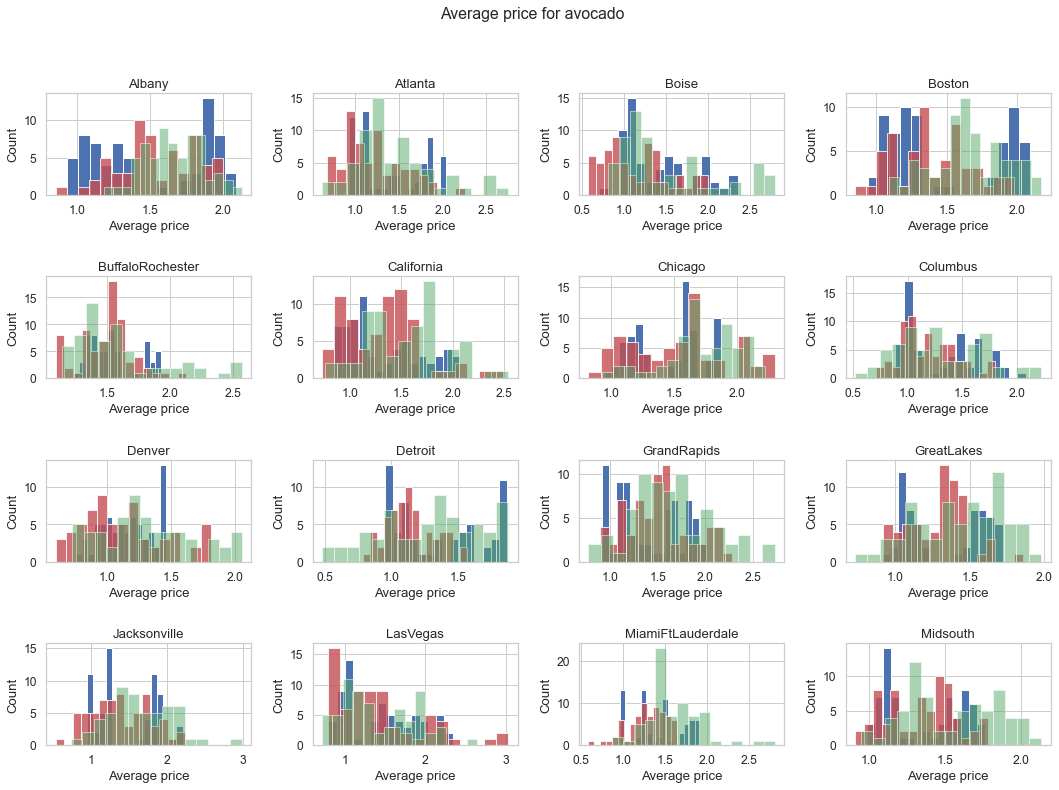

In [140]:
# extract a few regions to see wether there is a trend in the average price from year to year

# extract list of regions
region = df1['region'].unique()

fig, axes = plt.subplots(4,4, figsize=(18, 12))
fig.suptitle('Average price for avocado')
plt.subplots_adjust(wspace=0.3,hspace = 0.8)
k = 0
for i in range(4):
    for j in range(4):
        # extract data from a particular region
        tmp1 = df1[df1['region']==region[k]]
        # extract from a particular year
        tmp2 = tmp1[tmp1['year']==2015]
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
        sns.distplot(tmp2['AveragePrice'],color="b",ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 1}
        );
        # extract from a particular year
        tmp3 = tmp1[tmp1['year']==2016]
        sns.distplot(tmp3['AveragePrice'],color="r",ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 0.8}
        ).set(xlabel='Average price', ylabel='Count',title=region[k]);
        # extract from a particular year
        tmp4 = tmp1[tmp1['year']==2017]
        sns.distplot(tmp4['AveragePrice'],color="g",ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 0.5}
        ).set(xlabel='Average price', ylabel='Count',title=region[k]);
        k+=1
plt.show()

It is difficult to see wether there is a pattern in the distribution of average price from one year to the next.

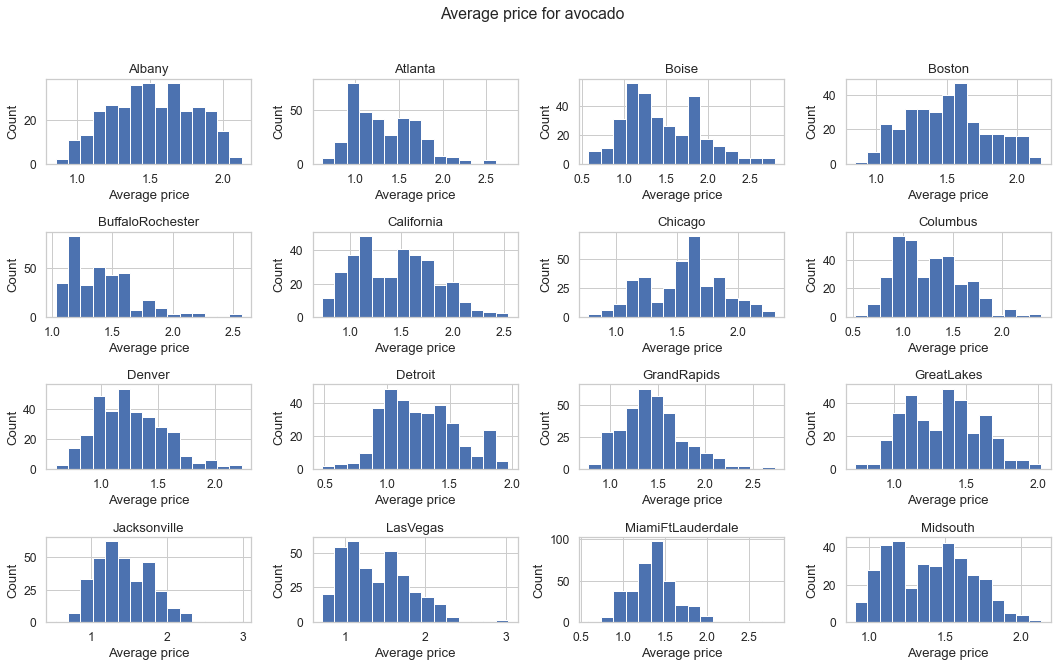

In [141]:
# average price from all years

# get list of regions
region = df1['region'].unique()

fig, axes = plt.subplots(4, 4, figsize=(18, 10))
fig.suptitle('Average price for avocado')
plt.subplots_adjust(wspace=0.3,hspace = 0.8)
k = 0
for i in range(4):
    for j in range(4):
        # extract data from a particular region
        tmp1 = df1[df1['region']==region[k]]
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
        sns.distplot(tmp1['AveragePrice'],ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 1}
        ).set(xlabel='Average price', ylabel='Count',title=region[k]);
        k+=1
plt.show()

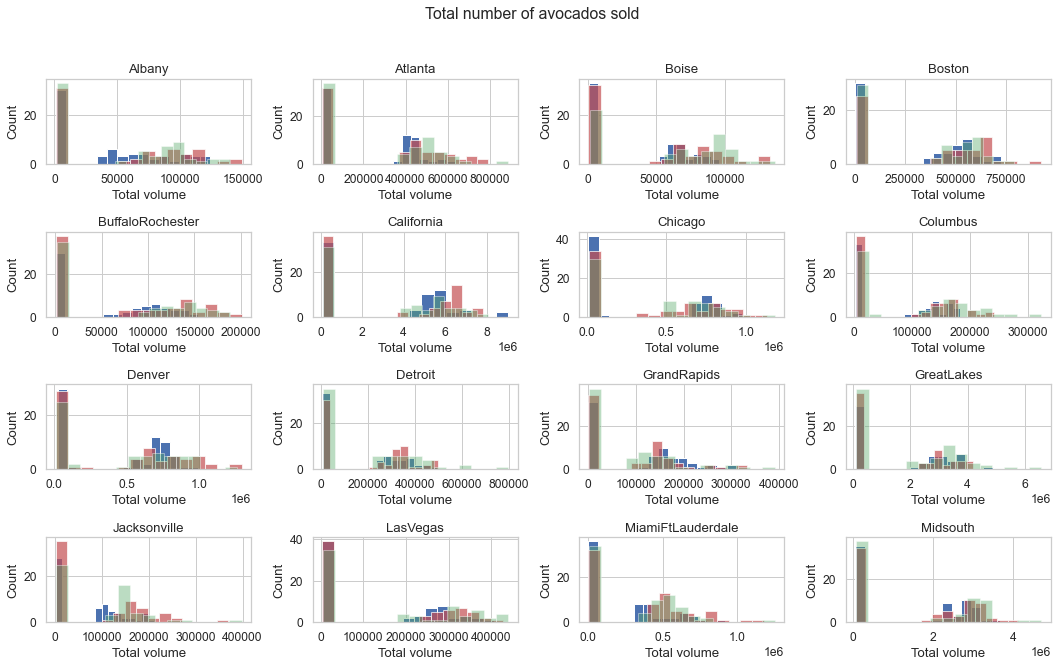

In [142]:
# extract a few regions to see wether there is a trend in the total volume from year to year

# get list of regions
region = df1['region'].unique()

fig, axes = plt.subplots(4, 4, figsize=(18, 10))
fig.suptitle('Total number of avocados sold')
plt.subplots_adjust(wspace=0.3,hspace = 0.8)
k = 0
for i in range(4):
    for j in range(4):
        # extract data from a particular region
        tmp1 = df1[df1['region']==region[k]]
        # extract from a particular year
        tmp2 = tmp1[tmp1['year']==2015]
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
        sns.distplot(tmp2['TotalVolume'],color="b",ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 1}
        )
        # extract from a particular year
        tmp3 = tmp1[tmp1['year']==2016]
        sns.distplot(tmp3['TotalVolume'],color="r",ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 0.7}
        ).set(xlabel='Total volume', ylabel='Count',title=region[k]);
        # extract from a particular year
        tmp4 = tmp1[tmp1['year']==2017]
        sns.distplot(tmp4['TotalVolume'],color="g",ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 0.4}
        ).set(xlabel='Total volume', ylabel='Count',title=region[k]);
        k+=1

      

The total volume distributions are fairly similar from one year to the next. However, there is a gap in total volumes. This may have an effect on the prediction, i.e., different performance on the small volumes compared to the larger volumes (**need to check this in the prediction notebook**). The overall distribution of the larger volumes looks quite similar, which is a good sign. 

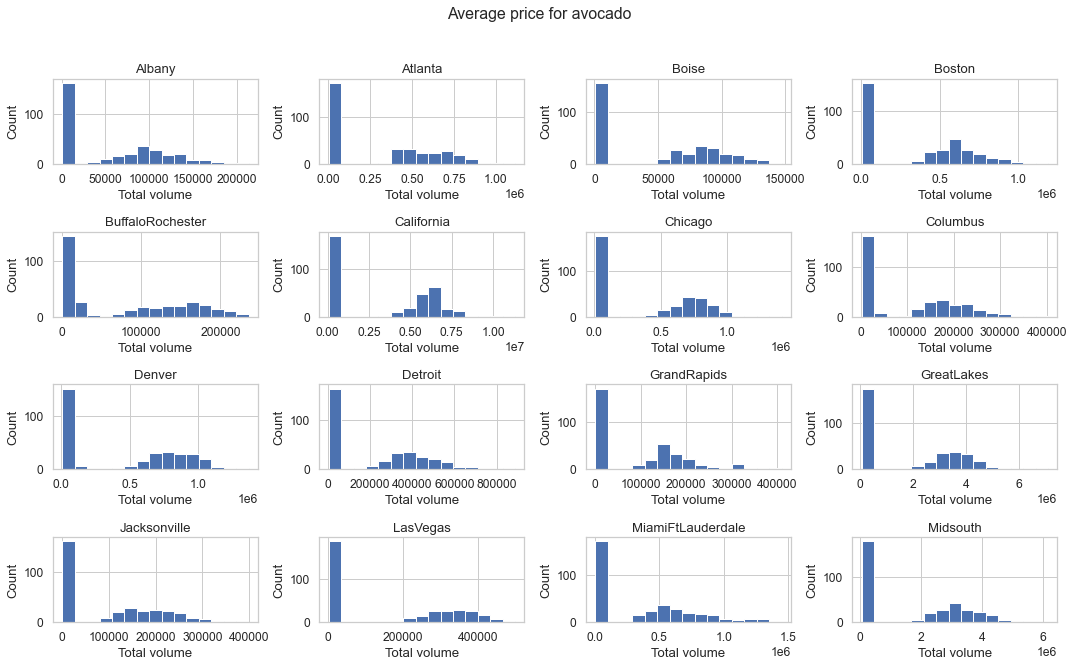

In [143]:
# average volume from all years

# get list of regions
region = df1['region'].unique()

fig, axes = plt.subplots(4, 4, figsize=(18, 10))
fig.suptitle('Average price for avocado')
plt.subplots_adjust(wspace=0.3,hspace = 0.8)
k = 0
for i in range(4):
    for j in range(4):
        # extract data from a particular region
        tmp1 = df1[df1['region']==region[k]]
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
        sns.distplot(tmp1['TotalVolume'],ax = axes[i,j], norm_hist=False, kde=False, bins=15, hist_kws={"alpha": 1}
        ).set(xlabel='Total volume', ylabel='Count',title=region[k]);
        k+=1

## 2. Data preprocessing

In [144]:
# convert date to numeric
df1 = df.copy()
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.week
df1.rename(columns={'Date': 'Week'}, inplace=True)

In [145]:
df1.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [148]:
# label encoder
le = preprocessing.LabelEncoder()
df1['type']   = le.fit_transform(df1['type'])
df1['region'] = le.fit_transform(df1['region'])
df1.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1
2,1,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,2
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4


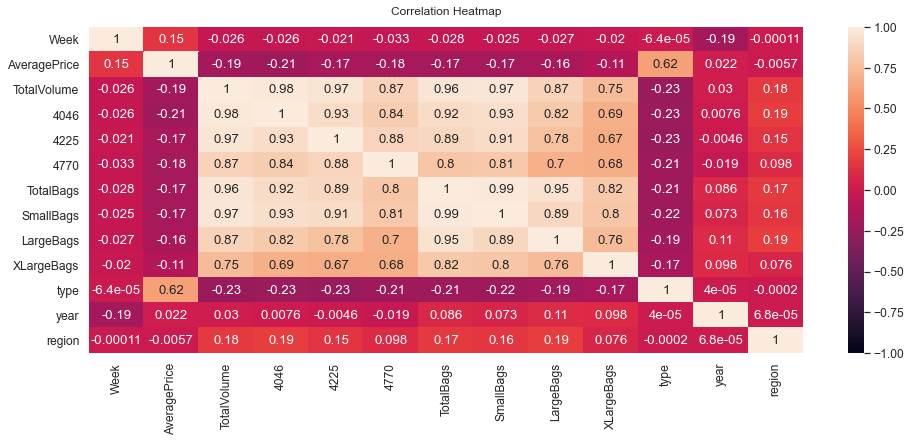

In [149]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The high correlation between Total volume and the rest of the volumes is obvious, since the total volume is just a linear combination of the other volumes with coefficients = 1, i.e., total volume = 4046 + 4225 + 4770 + total bags, where total bags = 1*small bags + ....

In [150]:
# remove nan values before looking at the data distribution 
df_dropna = df.copy()
df_dropna.dropna(inplace=True)
r = df_dropna.shape[0]/df.shape[0]

print("shape with NaN:",df.shape,"Shape without NaN:", df_dropna.shape, "The percentage of data points removed:",100-r*100)

shape with NaN: (25161, 13) Shape without NaN: (18401, 13) The percentage of data points removed: 26.86697667024363


This is a lot of data removed. Need to find a better way to fill in NaN. From the plots above we can see that the distribution from region to region varies quite much. In this case, I will fill the values of all the features from region to region.

In [151]:
df1.isnull().sum()

Week              0
AveragePrice    902
TotalVolume     949
4046            900
4225            906
4770            916
TotalBags       890
SmallBags       934
LargeBags       947
XLargeBags      868
type              0
year              0
region            0
dtype: int64

In [157]:
df1 = df.copy()
df1.rename(columns={'Date': 'Week','4046': 'Type1','4225': 'Type2','4770': 'Type3'}, inplace=True)
df1.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [158]:
df1.loc[df1.AveragePrice.isnull(), 'AveragePrice'] = df1.groupby('region').AveragePrice.transform('mean')
df1.loc[df1.TotalVolume.isnull(), 'TotalVolume'] = df1.groupby('region').TotalVolume.transform('mean')
df1.loc[df1.Type1.isnull(), 'Type1'] = df1.groupby('region').Type1.transform('mean')
df1.loc[df1.Type2.isnull(), 'Type2'] = df1.groupby('region').Type2.transform('mean')
df1.loc[df1.Type3.isnull(), 'Type3'] = df1.groupby('region').Type3.transform('mean')
df1.loc[df1.TotalBags.isnull(), 'TotalBags'] = df1.groupby('region').TotalBags.transform('mean')
df1.loc[df1.SmallBags.isnull(), 'SmallBags'] = df1.groupby('region').SmallBags.transform('mean')
df1.loc[df1.LargeBags.isnull(), 'LargeBags'] = df1.groupby('region').LargeBags.transform('mean')
df1.loc[df1.XLargeBags.isnull(), 'XLargeBags'] = df1.groupby('region').XLargeBags.transform('mean')

## 3. Analysis after preprocessing

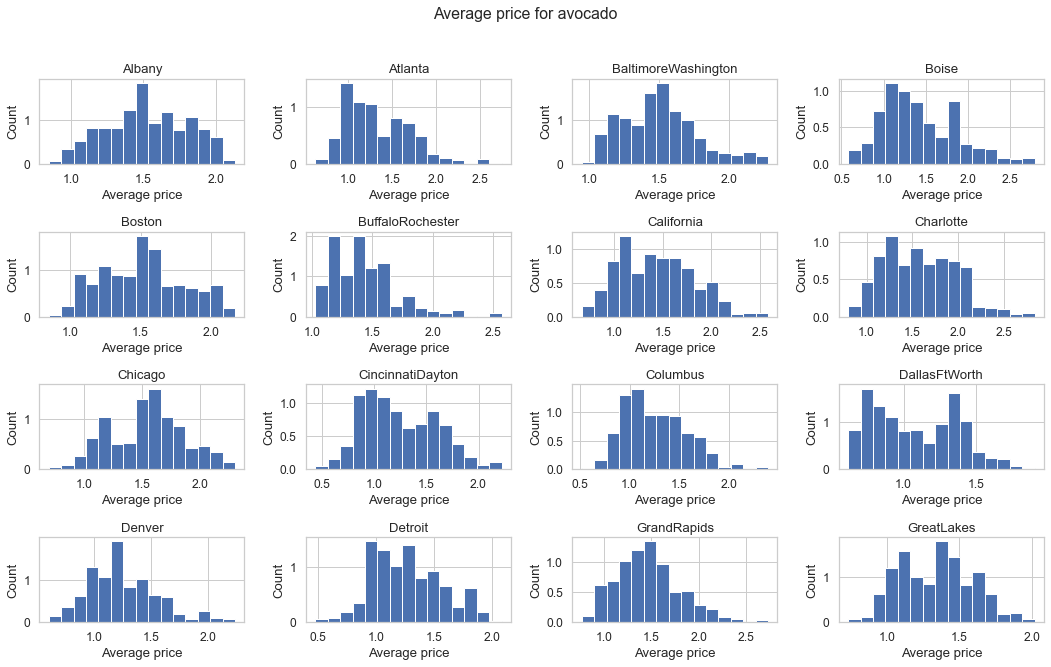

In [166]:
# average price from all years

# get list of regions
region = df1['region'].unique()

fig, axes = plt.subplots(4, 4, figsize=(18, 10))
fig.suptitle('Average price for avocado')
plt.subplots_adjust(wspace=0.3,hspace = 0.8)
k = 0
for i in range(4):
    for j in range(4):
        # extract data from a particular region
        tmp1 = df1[df1['region']==region[k]]
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
        sns.distplot(tmp1['AveragePrice'],ax = axes[i,j], norm_hist=True, kde=False, bins=15, hist_kws={"alpha": 1}
        ).set(xlabel='Average price', ylabel='Count',title=region[k]);
        k+=1
plt.savefig('average_price_af_proc')

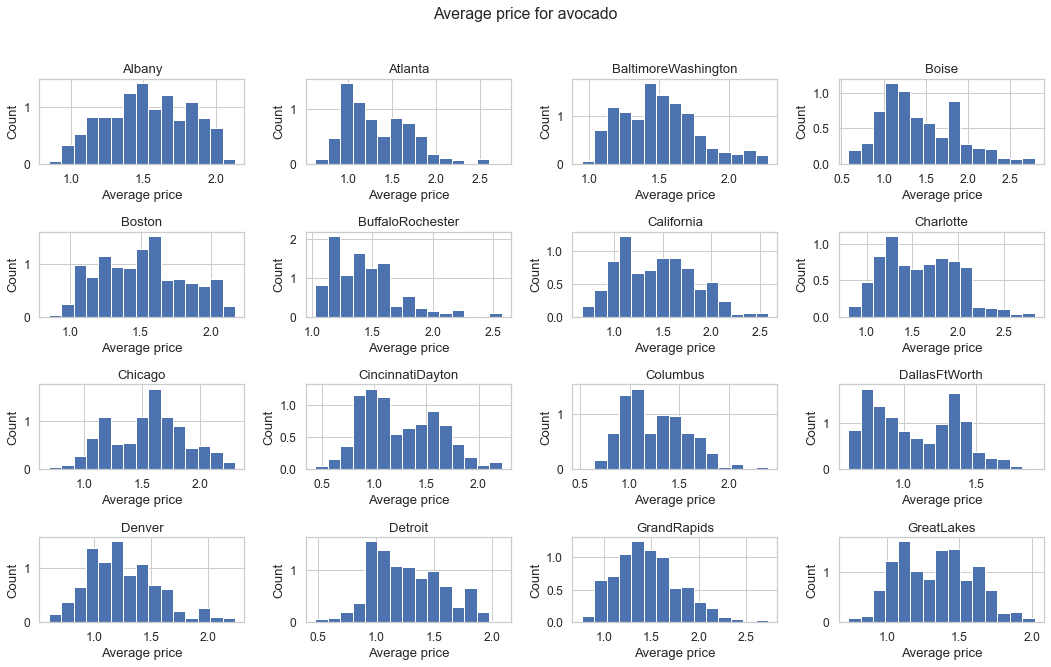

In [167]:
# average price from all years

# get list of regions
region = df['region'].unique()

fig, axes = plt.subplots(4, 4, figsize=(18, 10))
fig.suptitle('Average price for avocado')
plt.subplots_adjust(wspace=0.3,hspace = 0.8)
k = 0
for i in range(4):
    for j in range(4):
        # extract data from a particular region
        tmp1 = df[df['region']==region[k]]
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
        sns.distplot(tmp1['AveragePrice'],ax = axes[i,j], norm_hist=True, kde=False, bins=15, hist_kws={"alpha": 1}
        ).set(xlabel='Average price', ylabel='Count',title=region[k]);
        k+=1
plt.savefig('average_price_bf_proc')

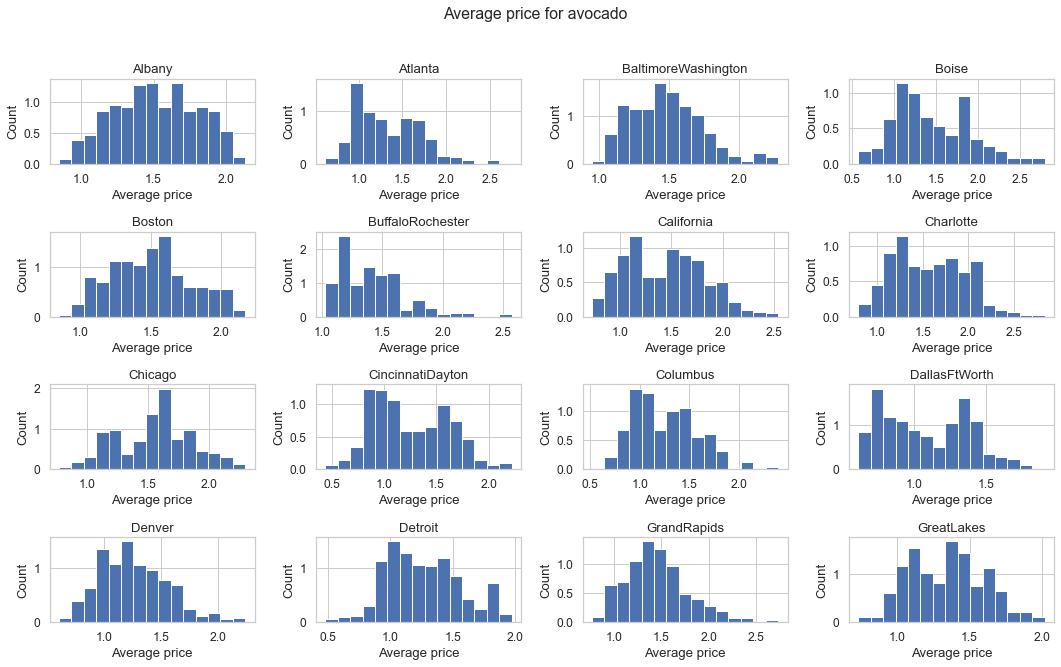

In [168]:
# average price from all years

# get list of regions
region = df['region'].unique()

fig, axes = plt.subplots(4, 4, figsize=(18, 10))
fig.suptitle('Average price for avocado')
plt.subplots_adjust(wspace=0.3,hspace = 0.8)
k = 0
for i in range(4):
    for j in range(4):
        # extract data from a particular region
        tmp1 = df_dropna[df_dropna['region']==region[k]]
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
        sns.distplot(tmp1['AveragePrice'],ax = axes[i,j], norm_hist=True, kde=False, bins=15, hist_kws={"alpha": 1}
        ).set(xlabel='Average price', ylabel='Count',title=region[k]);
        k+=1
plt.savefig('average_price_af_proc_dropna')

The data distribution changes more drastically with dropna